# 1.Importing of Library

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

# 2.Loading of Dataset

In [72]:
data=pd.read_csv('corona_tested_individuals_subset_ver_00100.csv')

# 3.Data Cleaning

In [73]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-05-16,0,0,0,0,0,אחר,NaN,NaN,Other
1,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
2,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
3,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
4,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other


In [74]:
data.shape

(240310, 10)

In [75]:
data.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       240310
gender                 100653
test_indication             0
dtype: int64

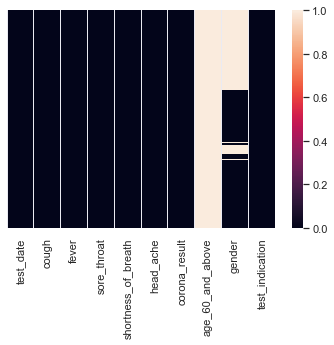

In [76]:
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [77]:
data.drop(['age_60_and_above'],axis=1,inplace=True)
data.drop(['test_date'],axis=1,inplace=True)

In [78]:
data=data.dropna()

In [79]:
data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
test_indication        0
dtype: int64

In [80]:
data['corona_result'].value_counts()

שלילי    134707
אחר        4689
חיובי       261
Name: corona_result, dtype: int64

In [81]:
data['gender'].value_counts()

נקבה    74159
זכר     65498
Name: gender, dtype: int64

In [82]:
data['corona_result'].replace('שלילי','Negative',inplace=True)
data['corona_result'].replace('חיובי','Positive',inplace=True)
data['corona_result'].replace('אחר','Other',inplace=True)

In [83]:
data['gender'].replace('נקבה','Female',inplace=True)
data['gender'].replace('זכר','Male',inplace=True)

In [84]:
data.shape

(139657, 8)

In [85]:
data['corona_result'].value_counts()

Negative    134707
Other         4689
Positive       261
Name: corona_result, dtype: int64

In [86]:
data=data[data['corona_result']!='Other']

In [87]:
data.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
88408,1,0,0,0,0,Negative,Male,Other
88409,0,0,0,0,0,Negative,Female,Other
88410,0,0,0,0,0,Negative,Female,Other
88411,0,0,0,0,0,Negative,Female,Other
88412,0,0,0,0,0,Negative,Male,Other
88413,0,0,0,0,0,Negative,Male,Other
88414,0,0,0,0,0,Negative,Female,Other
88415,0,0,0,0,0,Negative,Female,Other
88416,0,0,0,0,0,Negative,Male,Other
88417,0,0,0,0,0,Negative,Female,Other


In [88]:
for i in data.columns:
    print('Attribute Name:',i)
    print("------------------")
    print(data[i].value_counts())
    print('--------------------')

Attribute Name: cough
------------------
0    132476
1      2492
Name: cough, dtype: int64
--------------------
Attribute Name: fever
------------------
0    133142
1      1826
Name: fever, dtype: int64
--------------------
Attribute Name: sore_throat
------------------
0    134302
1       666
Name: sore_throat, dtype: int64
--------------------
Attribute Name: shortness_of_breath
------------------
0    134766
1       202
Name: shortness_of_breath, dtype: int64
--------------------
Attribute Name: head_ache
------------------
0    133776
1      1192
Name: head_ache, dtype: int64
--------------------
Attribute Name: corona_result
------------------
Negative    134707
Positive       261
Name: corona_result, dtype: int64
--------------------
Attribute Name: gender
------------------
Female    71245
Male      63723
Name: gender, dtype: int64
--------------------
Attribute Name: test_indication
------------------
Other                     131792
Contact with confirmed      2707
Abroad     

In [89]:
data.shape

(134968, 8)

In [90]:
data.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
88408,1,0,0,0,0,Negative,Male,Other
88409,0,0,0,0,0,Negative,Female,Other
88410,0,0,0,0,0,Negative,Female,Other
88411,0,0,0,0,0,Negative,Female,Other
88412,0,0,0,0,0,Negative,Male,Other
88413,0,0,0,0,0,Negative,Male,Other
88414,0,0,0,0,0,Negative,Female,Other
88415,0,0,0,0,0,Negative,Female,Other
88416,0,0,0,0,0,Negative,Male,Other
88417,0,0,0,0,0,Negative,Female,Other


In [91]:
data[['gender']] = encoder.fit_transform(data['gender'].astype(str))
data[['test_indication']] = encoder.fit_transform(data['test_indication'].astype(str))
data[['corona_result']] = encoder.fit_transform(data['corona_result'].astype(str))

In [92]:
data.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
88408,1,0,0,0,0,0,1,2
88409,0,0,0,0,0,0,0,2
88410,0,0,0,0,0,0,0,2
88411,0,0,0,0,0,0,0,2
88412,0,0,0,0,0,0,1,2
88413,0,0,0,0,0,0,1,2
88414,0,0,0,0,0,0,0,2
88415,0,0,0,0,0,0,0,2
88416,0,0,0,0,0,0,1,2
88417,0,0,0,0,0,0,0,2


In [93]:
data.dtypes

cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
corona_result          int32
gender                 int32
test_indication        int32
dtype: object

In [94]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
count,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000
mean,0.018464,0.013529,0.004935,0.001497,0.008832,0.001934,0.472134,1.972994
std,0.134621,0.115526,0.070073,0.038658,0.093562,0.043933,0.499225,0.182283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [95]:
missing_values=data.isnull().sum()

percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
cough,0,0.0
fever,0,0.0
sore_throat,0,0.0
shortness_of_breath,0,0.0
head_ache,0,0.0
corona_result,0,0.0
gender,0,0.0
test_indication,0,0.0


# 4.Data Visualisation

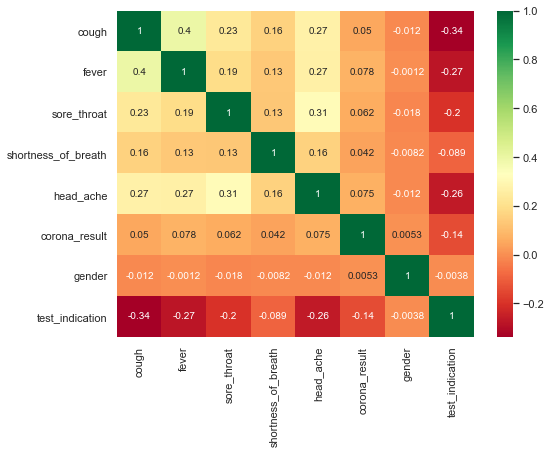

In [96]:
corrmat=data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(8,6))
g=sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [97]:
plt.figure(figsize=(20,12))
data.corrwith(data['corona_result'])

cough                  0.050338
fever                  0.078056
sore_throat            0.061883
shortness_of_breath    0.041922
head_ache              0.075157
corona_result          1.000000
gender                 0.005328
test_indication       -0.139662
dtype: float64

<Figure size 1440x864 with 0 Axes>

Negative(0): 134707
Positive(1): 261


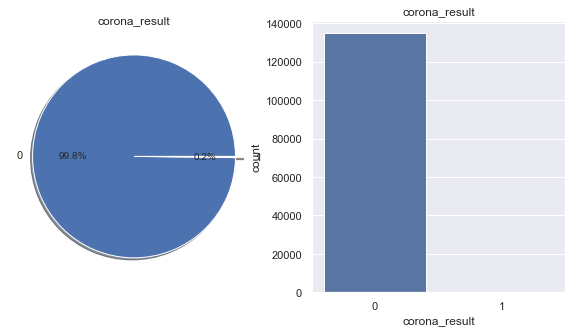

In [98]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['corona_result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('corona_result')
ax[0].set_ylabel('')
sns.countplot('corona_result',data=data,ax=ax[1])
ax[1].set_title('corona_result')
N,P=data['corona_result'].value_counts()
print('Negative(0):',N)
print('Positive(1):',P)
plt.show()

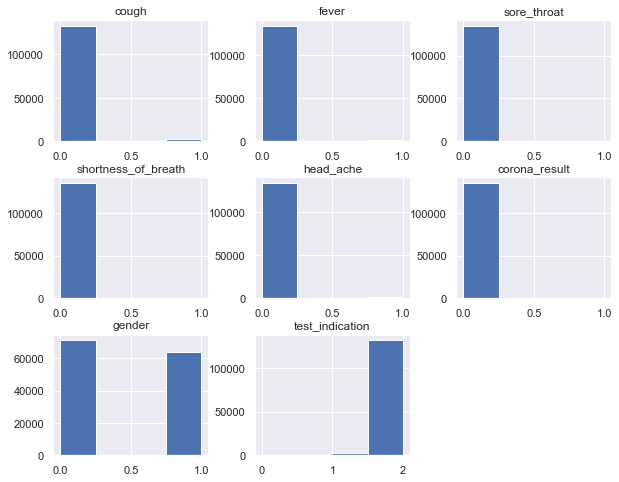

In [99]:
data.hist(bins=4,figsize=(10,8))
plt.show()

# 5. Under Sampling

In [100]:
minority_class_len=len(data[data['corona_result']==1])
print(minority_class_len)

261


In [101]:
majority_class_indices=data[data['corona_result']==0].index
print(majority_class_indices)

Int64Index([ 88408,  88409,  88410,  88411,  88412,  88413,  88414,  88415,
             88416,  88417,
            ...
            240300, 240301, 240302, 240303, 240304, 240305, 240306, 240307,
            240308, 240309],
           dtype='int64', length=134707)


In [102]:
np.random.seed(7)
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

261


In [103]:
minority_class_indices=data[data['corona_result']==1].index
print(minority_class_indices)

Int64Index([ 88926,  88993,  88997,  89030,  89037,  89058,  89060,  89114,
             89145,  89158,
            ...
            239750, 239761, 239773, 239777, 239811, 239812, 239821, 239822,
            239826, 239830],
           dtype='int64', length=261)


In [104]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [105]:
under_sample=data.loc[under_sample_indices]

In [106]:
under_sample.shape

(522, 8)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

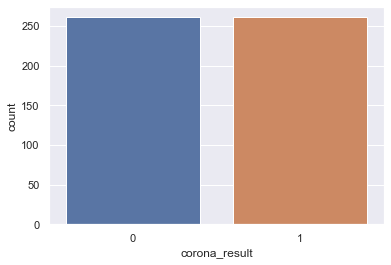

In [107]:
sns.countplot(x='corona_result',data=under_sample)

In [108]:
X=under_sample.drop('corona_result',axis=1)
y=under_sample['corona_result']

In [109]:
X.shape

(522, 7)

In [110]:
y.shape

(522,)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=10)

# 6. Different Training Models

*******PERFORMANCE DETAILS OF LOGISTIC REGRESSION********

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        58
           1       1.00      0.77      0.87        47

    accuracy                           0.90       105
   macro avg       0.92      0.88      0.89       105
weighted avg       0.91      0.90      0.89       105



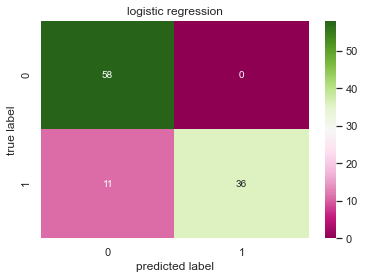

In [112]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.0001, max_iter=100, penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred)
recall_lr = rs(y_test,y_pred)
precision_lr = ps(y_test,y_pred)
f1_lr = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF LOGISTIC REGRESSION********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="logistic regression", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)

In [113]:
log_reg=LogisticRegression()

In [114]:
Grid=GridSearchCV(log_reg,{'penalty':['elasticnet','none'],'C':np.logspace(-4,4,20),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[100,1000,2500]},cv=10,n_jobs=-1)
Grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [115]:
Grid.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

*******PERFORMANCE DETAILS RANDOM FOREST CLASSIFIER********

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        58
           1       1.00      0.79      0.88        47

    accuracy                           0.90       105
   macro avg       0.93      0.89      0.90       105
weighted avg       0.92      0.90      0.90       105



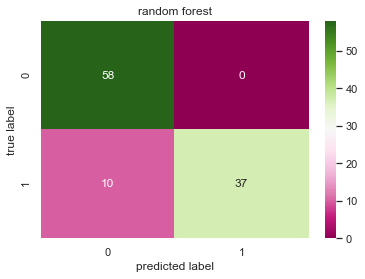

In [116]:
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(criterion='gini',bootstrap=True,max_depth=3,min_samples_split=2,max_features='auto',n_estimators=10,random_state=6)
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)
acc_RF=accuracy_score(y_test,y_pred)
recall_RF = rs(y_test,y_pred)
precision_RF = ps(y_test,y_pred)
f1_RF = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS RANDOM FOREST CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="random forest", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)

In [117]:
n_estimators = [1,4,10,100]
max_features = ['auto', 'sqrt']
max_depth = [1,2,3]
min_samples_split = [2]
bootstrap = [True, False]
criterion=['gini','entropy']
random_state=[6]

In [118]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
                'criterion':criterion,
               'random_state':random_state
             }

In [119]:
Classifier=RandomForestClassifier()

In [120]:
rf_Grid = GridSearchCV(estimator = Classifier, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [121]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2],
                         'n_estimators': [1, 4, 10, 100], 'random_state': [6]},
             verbose=2)

In [122]:
rf_Grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 10,
 'random_state': 6}

*******PERFORMANCE DETAILS OF K-NEIGHBORS CLASSIFIER********

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        58
           1       1.00      0.72      0.84        47

    accuracy                           0.88       105
   macro avg       0.91      0.86      0.87       105
weighted avg       0.90      0.88      0.87       105

0.8761904761904762


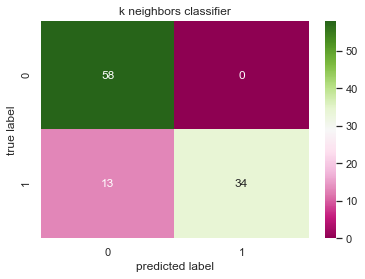

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_KNN=accuracy_score(y_test,y_pred)
recall_KNN = rs(y_test,y_pred)
precision_KNN = ps(y_test,y_pred)
f1_KNN = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF K-NEIGHBORS CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="k neighbors classifier",xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)
print(acc_KNN)

In [124]:
knn_cf=KNeighborsClassifier()
knn_grid=GridSearchCV(knn_cf,{'n_neighbors':[3,6,9], 'p':[3,5,7]},cv=10,n_jobs=-1)
knn_grid.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 6, 9], 'p': [3, 5, 7]})

In [125]:
knn_grid.best_params_

{'n_neighbors': 6, 'p': 3}

*******PERFORMANCE DETAILS OF SUPPORT VECTOR MACHINE********

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        58
           1       1.00      0.77      0.87        47

    accuracy                           0.90       105
   macro avg       0.92      0.88      0.89       105
weighted avg       0.91      0.90      0.89       105



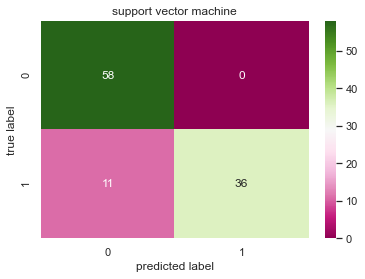

In [126]:
from sklearn import svm
clf = svm.SVC(C=1,degree=3,kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_SVM=accuracy_score(y_test,y_pred)
recall_SVM = rs(y_test,y_pred)
precision_SVM = ps(y_test,y_pred)
f1_SVM = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF SUPPORT VECTOR MACHINE********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="support vector machine", xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)

In [ ]:
param_grid={ 'C':[0.1,1,100,1000],'kernel':['rbf','poly','linear'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.1)
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)
acc_GNB=accuracy_score(y_test,y_pred)
recall_GNB= rs(y_test,y_pred)
precision_GNB = ps(y_test,y_pred)
f1_GNB = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF GAUSSIAN NAIVE BAYES CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="gaussian naive bayes", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)
print(acc_GNB)

In [ ]:
param_nb={'var_smoothing':np.logspace(0,-9,num=100)}

In [ ]:
nb_grid=GridSearchCV(estimator = GNB, param_grid = param_nb, cv = 10, verbose=1, n_jobs = -1)
nb_grid.fit(X_train,y_train)

In [ ]:
nb_grid.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t =DecisionTreeClassifier(criterion= 'gini',max_depth=4,min_samples_leaf=3,min_samples_split=2)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)
acc_DT=accuracy_score(y_test,y_pred)
recall_DT = rs(y_test,y_pred)
precision_DT = ps(y_test,y_pred)
f1_DT = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF DECISION TREE********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True,cmap="PiYG")
ax.set(title="decision tree",xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)
print(acc_DT)

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
param_dict={'criterion':['gini','entropy'],
            'max_depth': range(1,5),
            'min_samples_split':range(1,5),
            'min_samples_leaf':range(1,5)}

In [ ]:
grid_dict=GridSearchCV(estimator=DT, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid_dict.fit(X_train,y_train)

In [ ]:
grid_dict.best_params_

# 7. Performance Comparision

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'KNN','Support Vector Machines', 'Gaussian Naive Bayes',   
              'Decision Tree'],
    'Accuracy': [acc_lr, acc_RF, acc_KNN, acc_SVM, acc_GNB, acc_DT],
    'Recall'  : [recall_lr,recall_RF,recall_KNN,recall_SVM,recall_GNB,recall_DT],
    'Precision':[precision_lr,precision_RF,precision_KNN,precision_SVM,acc_GNB,precision_DT],
    'F-1 Score':[f1_lr,f1_RF,f1_KNN,f1_SVM,f1_GNB,f1_DT]})
models.sort_values(by='Accuracy', ascending=True).style.hide_index()

In [ ]:
fig = plt.figure(figsize=(8,6))

plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[f1_lr,f1_RF,f1_KNN,f1_SVM,f1_GNB,f1_DT],color='purple',marker='D')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[acc_lr,acc_RF,acc_KNN,acc_SVM,acc_GNB,acc_DT],color='red',marker='^')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[precision_lr,precision_RF,precision_KNN,precision_SVM,acc_GNB,precision_DT],color='blue',marker='s')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[recall_lr,recall_RF,recall_KNN,recall_SVM,recall_GNB,recall_DT],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')
plt.show(fig)

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.barh(['LR','RF', 'KNN','SVM', 'GNB','DT'],[acc_lr,acc_RF,acc_KNN,acc_SVM,acc_GNB,acc_DT],color=['red','green','purple','orange','Blue'],height=0.4)